In [1]:
from scipy.special import expit
from rbmpy.rbm import RBM
from rbmpy.sampler import VanillaSampler,ContinuousSampler,ContinuousApproxSampler, ContinuousApproxMulDimSampler, ApproximatedSampler, LayerWiseApproxSampler,ApproximatedMulDimSampler
from rbmpy.trainer import VanillaTrainier
from rbmpy.performance import Result
import numpy as np
import rbmpy.datasets, rbmpy.performance, rbmpy.plotter, pickle, rbmpy.rbm, os, logging, rbmpy.sampler,math
import math
from rbmpy.rbm import weights_into_hiddens

from IPython.core.debugger import Tracer

import rbmpy.plotter as pp
from numpy import newaxis
from collections import Counter

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

logger = logging.getLogger()
# Set the logging level to logging.DEBUG 
logger.setLevel(logging.INFO)

%matplotlib inline

In [2]:
def gen_ds_bar(bar_height, image_size):
    a = np.zeros((image_size -bar_height, image_size,image_size))
    for i in range(image_size - bar_height):
        c = i + 1 #np.random.randint(bar_height/2.0, image_size-(bar_height/2.0))
        a[i,(c-(bar_height/2.0)):(c+(bar_height/2.0))] = 1
    return a
                    

In [3]:
ds_zeros = np.load('datasets/0.npy')
ds_ones = np.load('datasets/1.npy')
ds_twos = np.load('datasets/2.npy')
ds_three = np.load('datasets/3.npy')
ds_four = np.load('datasets/4.npy')
ds_five = np.load('datasets/5.npy')
ds_six = np.load('datasets/6.npy')
ds_seven = np.load('datasets/7.npy')
ds_eight = np.load('datasets/8.npy')
ds_nine = np.load('datasets/9.npy')
ds_bar = gen_ds_bar(2, 28)
ds = [ds_zeros, ds_ones, ds_twos, ds_three, ds_four,ds_five,ds_six,ds_seven,ds_eight,ds_nine]

In [4]:
# with open("datasets/bar",'rb') as f:
# np.save("datasets/bar", ds_bar)

In [23]:
def train_two_models(dataset_one, dataset_two,num_hid, epochs ,training_size = 100):

    ds_1_train = dataset_one[0:training_size]
    ds_2_train = dataset_two[0:training_size]
    ds_comp_train = np.maximum(ds_2_train, ds_1_train)
    
    return (get_model_and_trainer(num_hid[0],ds_1_train,epochs[0]),  get_model_and_trainer(num_hid[1],ds_2_train,epochs[1]))


def eval_complex_model(model):
    sampler = ContinuousSampler(model)
    
    num_vis = round(math.sqrt(model.visible.shape[1]))
    
    logging.info("Reconstruction/Samples")
    pp.images(sampler.reconstruction_given_visible(model.visible).reshape(model.visible.shape[0],28,28)[0:5])
    logging.info("Dreams")
    dreams = []
    for i in range(5):
        dreams.append(sampler.dream(model, return_sigmoid = True))

    pp.image(np.array(dreams).reshape(5,num_vis,num_vis), color_range= (0,1))
    logging.info("Hinton Diagrams 0 - 10")
    pp.images(rbmpy.rbm.weights_into_hiddens(model.weights)[:15], cmap="Greys")

In [24]:
def get_model_and_trainer(num_hid, training, epochs, batches, l_r = 0.002):
    training_size = training.shape[0]
    num_vis = training.shape[1] * training.shape[2]
    model = RBM(num_hid,num_vis, training_size)
    trainerer(model, training, epochs, l_r, batches)
#     trainer.train(epochs, rbmpy.datasets.flatten_data_set(training), learning_rate = l_r,logging_freq=10)
    return model

def trainerer(model,training,epochs,l_r, batches):
    sampler = ContinuousSampler(model)
    trainer = VanillaTrainier(model, sampler)
    trainer.batch_train(epochs,rbmpy.datasets.flatten_data_set(training), batches, learning_rate = l_r, use_visible_bias = False)
    
def save_model(model, name):
    with open("models/{}".format(name), 'wb') as f:
        pickle.dump(model,f)

INFO:Batch Logger:Created Progress logger for task - Batch Logger
INFO:Batch Logger:0.0% complete
INFO:Batch Logger:20.0% complete
INFO:Batch Logger:40.0% complete
INFO:Batch Logger:60.0% complete
INFO:Batch Logger:80.0% complete
INFO:root:Reconstruction/Samples


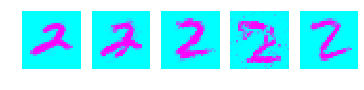

INFO:root:Dreams


TypeError: Invalid dimensions for image data

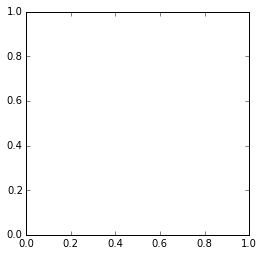

In [25]:
a = get_model_and_trainer(100, ds_twos[:100], 1000, 5,l_r=0.02)
eval_complex_model(a)

In [ ]:
trainerer(a, ds_twos[:100],1000,0.02,5)
eval_complex_model(a)

for d in ds[1:]:
    trainerer(a,d[:10], 1000,l_r = 0.006, batches= 5 )

trainerer(a,ds_three[:200], 1000,l_r = 0.002, batches= 1 )

INFO:root:Reconstruction/Samples


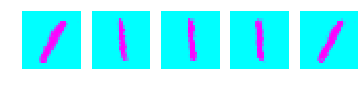

INFO:root:Dreams


1.91704602522e-23 0.841104781952


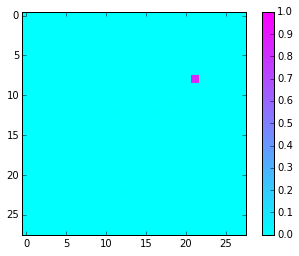

INFO:root:Hinton Diagrams 0 - 10


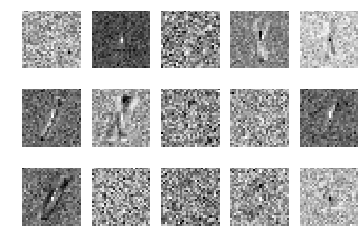

In [14]:
# !say "Finished"
eval_complex_model(a)

In [64]:
save_model(a, "attempt_two/zero_models")

with open("models/bar_models", "rb") as f:
    a = pickle.load(f)

In [35]:
trainerer(a,ds_twos[:100], 10,l_r = 0.002, batches = 5)

INFO:Batch Logger:Created Progress logger for task - Batch Logger
INFO:Batch Logger:0.0% complete
INFO:Batch Logger:20.0% complete
INFO:Batch Logger:40.0% complete
INFO:Batch Logger:60.0% complete
INFO:Batch Logger:80.0% complete


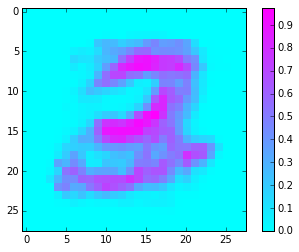

In [36]:
vs = ContinuousSampler(a)
ds_twos[0].shape
pp.image(vs.reconstruction_given_visible(ds_twos[0].reshape(784)).reshape(28,28))

In [33]:
ds_all = np.vstack((ds))
        

In [43]:
from sklearn.neural_network import BernoulliRBM
model = BernoulliRBM(n_components=100, n_iter=40)
model.fit(rbmpy.datasets.flatten_data_set(ds_all))


BernoulliRBM(batch_size=10, learning_rate=0.1, n_components=100, n_iter=40,
       random_state=None, verbose=0)

INFO:root:Reconstruction/Samples


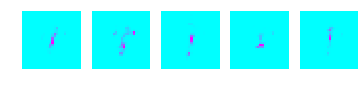

INFO:root:Dreams


8.16890121208e-08 0.999247036164


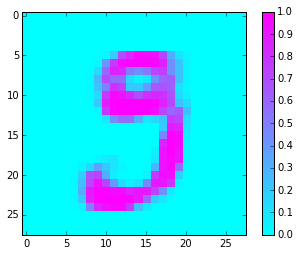

INFO:root:Hinton Diagrams 0 - 10


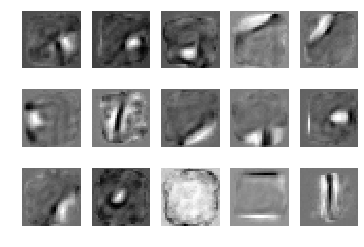

In [44]:
eval_complex_model(rbmpy.rbm.create_from_sklearn_rbm(model, 784, ds_nine.shape[0]))

In [45]:
model


BernoulliRBM(batch_size=10, learning_rate=0.1, n_components=300, n_iter=10,
       random_state=None, verbose=0)

300